In [1]:
%pip install transformers datasets torch librosa scikit-learn

%pip install torch torchvision torchaudio -f https://download.pytorch.org/whl/torch_stable.html


Note: you may need to restart the kernel to use updated packages.
Looking in links: https://download.pytorch.org/whl/torch_stable.html
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import librosa
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import os
from sklearn.metrics import classification_report

# Assuming your data is in the form of a directory with subdirectories for each emotion
data_dir = '../database/Emotions'
emotions = ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Surprised']
label_encoder = LabelEncoder()
label_encoder.fit(emotions)

def preprocess_audio(file_path):
    try:
        audio, sr = librosa.load(file_path, sr=16000)
        return audio
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

# Create a dataset
class EmotionDataset(Dataset):
    def __init__(self, file_paths, labels):
        self.file_paths = file_paths
        self.labels = labels

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        audio = preprocess_audio(self.file_paths[idx])
        label = self.labels[idx]
        return torch.tensor(audio, dtype=torch.float32), torch.tensor(label, dtype=torch.int64)

# Collect all file paths and their labels
file_paths = []
labels = []
for emotion in emotions:
    emotion_dir = os.path.join(data_dir, emotion)
    for filename in os.listdir(emotion_dir):
        file_paths.append(os.path.join(emotion_dir, filename))
        labels.append(emotion)

# Encode labels to integers
labels = label_encoder.transform(labels)

# Split the dataset into training and testing
train_paths, test_paths, train_labels, test_labels = train_test_split(file_paths, labels, test_size=0.3, random_state=42)
# Further split test set into validation and test sets
val_paths, test_paths, val_labels, test_labels = train_test_split(test_paths, test_labels, test_size=0.5, random_state=42)

# Create datasets
train_dataset = EmotionDataset(train_paths, train_labels)
val_dataset = EmotionDataset(val_paths, val_labels)
test_dataset = EmotionDataset(test_paths, test_labels)

# Create data loaders
batch_size = 8



In [2]:
import librosa

file_path = '../database/Emotions\\Angry\\03-01-05-01-01-01-01.wav'
audio, sr = librosa.load(file_path, sr=None)  # Load the audio file with its original sample rate

print(f'Original sample rate: {sr}')
print(f'Duration: {len(audio) / sr} seconds')

Original sample rate: 48000
Duration: 3.8705416666666665 seconds


In [4]:
print(file_paths)

['../database/Emotions\\Angry\\03-01-05-01-01-01-01.wav', '../database/Emotions\\Angry\\03-01-05-01-01-01-02.wav', '../database/Emotions\\Angry\\03-01-05-01-01-01-03.wav', '../database/Emotions\\Angry\\03-01-05-01-01-01-04.wav', '../database/Emotions\\Angry\\03-01-05-01-01-01-05.wav', '../database/Emotions\\Angry\\03-01-05-01-01-01-06.wav', '../database/Emotions\\Angry\\03-01-05-01-01-01-07.wav', '../database/Emotions\\Angry\\03-01-05-01-01-01-08.wav', '../database/Emotions\\Angry\\03-01-05-01-01-01-09.wav', '../database/Emotions\\Angry\\03-01-05-01-01-01-10.wav', '../database/Emotions\\Angry\\03-01-05-01-01-01-11.wav', '../database/Emotions\\Angry\\03-01-05-01-01-01-12.wav', '../database/Emotions\\Angry\\03-01-05-01-01-01-13.wav', '../database/Emotions\\Angry\\03-01-05-01-01-01-14.wav', '../database/Emotions\\Angry\\03-01-05-01-01-01-15.wav', '../database/Emotions\\Angry\\03-01-05-01-01-01-16.wav', '../database/Emotions\\Angry\\03-01-05-01-01-01-17.wav', '../database/Emotions\\Angry\\

In [5]:
import torch

print(torch.cuda.is_available())  # Check if CUDA is available
print(torch.cuda.get_device_name(0))  # Get the name of the CUDA device

True
NVIDIA GeForce RTX 3060 Laptop GPU


In [14]:
from transformers import Wav2Vec2ForSequenceClassification
from transformers import Wav2Vec2Processor

# Load the processor and the model
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForSequenceClassification.from_pretrained(
    "facebook/wav2vec2-base-960h",
    num_labels=len(emotions),
    problem_type="single_label_classification",
)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
# print(f"Using device: {device}")

Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Wav2Vec2ForSequenceClassification(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2GroupNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (activation): GELUActivation()
          (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        )
        (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): Wav2Vec2FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (projection): Linear(in_features=512, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)


In [6]:
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader

# Define a custom collate function for padding
def collate_fn(batch):
    # Assume batch is a list of (sequence, label)
    sequences, labels = zip(*batch)
    
    # Pad sequences to the maximum length of any sequence
    padded_sequences = pad_sequence(sequences, batch_first=True, padding_value=0)
    
    # Convert labels to a tensor
    labels = torch.tensor(labels)
    
    return padded_sequences, labels

# Create DataLoader with custom collate_fn
train_loader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=False)


In [6]:
# Make sure the model is in evaluation mode
model.eval()

true_labels = []
predicted_labels = []

# Disable gradient calculation for inference
with torch.no_grad():
    for audio_inputs, labels in test_loader:
        audio_inputs = audio_inputs.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(audio_inputs)
        
        # Get the predictions
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)
        
        # Move predictions and labels to CPU and convert to numpy for sklearn
        predicted_labels.extend(predictions.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Convert encoded labels back to original labels
predicted_labels = label_encoder.inverse_transform(predicted_labels)
true_labels = label_encoder.inverse_transform(true_labels)

# Print classification report
print(classification_report(true_labels, predicted_labels, target_names=emotions))


              precision    recall  f1-score   support

       Angry       0.13      0.25      0.17       305
   Disgusted       0.00      0.00      0.00       290
     Fearful       0.14      0.60      0.23       309
       Happy       0.00      0.00      0.00       316
     Neutral       0.00      0.00      0.00       276
         Sad       1.00      0.01      0.01       324
   Surprised       0.00      0.00      0.00       100

    accuracy                           0.14      1920
   macro avg       0.18      0.12      0.06      1920
weighted avg       0.21      0.14      0.07      1920



c:\CodeRepo\DS-Capstone-Spring-2024\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\CodeRepo\DS-Capstone-Spring-2024\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\CodeRepo\DS-Capstone-Spring-2024\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [7]:
from torch.optim import AdamW
from tqdm import tqdm

def train(model, train_loader, val_loader, epochs):
    optimizer = AdamW(model.parameters(), lr=1e-4)
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch in tqdm(train_loader):
            optimizer.zero_grad()
            input_values = batch[0].to(device)
            labels = batch[1].to(device)
            outputs = model(input_values=input_values, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Training loss after epoch {epoch + 1}: {total_loss / len(train_loader)}")

        # Validation
        model.eval()
        total_eval_loss = 0
        for batch in tqdm(val_loader):
            with torch.no_grad():
                input_values = batch[0].to(device)
                labels = batch[1].to(device)
                outputs = model(input_values=input_values, labels=labels)
                loss = outputs.loss
                total_eval_loss += loss.item()
        print(f"Validation loss after epoch {epoch + 1}: {total_eval_loss / len(val_loader)}")

# Train the model
train(model, train_loader, val_loader, epochs=3)


100%|██████████| 1120/1120 [12:53<00:00,  1.45it/s]


Training loss after epoch 1: 1.9007685118487903


100%|██████████| 240/240 [00:51<00:00,  4.67it/s]


Validation loss after epoch 1: 1.8924302885929742


100%|██████████| 1120/1120 [11:17<00:00,  1.65it/s]


Training loss after epoch 2: 1.896189896017313


100%|██████████| 240/240 [00:41<00:00,  5.72it/s]


Validation loss after epoch 2: 1.8925176680088043


100%|██████████| 1120/1120 [11:45<00:00,  1.59it/s]


Training loss after epoch 3: 1.8956951961985655


100%|██████████| 240/240 [00:42<00:00,  5.63it/s]


Validation loss after epoch 3: 1.8924665749073029


In [8]:
# Make sure the model is in evaluation mode
model.eval()

true_labels = []
predicted_labels = []

# Disable gradient calculation for inference
with torch.no_grad():
    for audio_inputs, labels in test_loader:
        audio_inputs = audio_inputs.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(audio_inputs)
        
        # Get the predictions
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)
        
        # Move predictions and labels to CPU and convert to numpy for sklearn
        predicted_labels.extend(predictions.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Convert encoded labels back to original labels
predicted_labels = label_encoder.inverse_transform(predicted_labels)
true_labels = label_encoder.inverse_transform(true_labels)

# Print classification report
print(classification_report(true_labels, predicted_labels, target_names=emotions))


              precision    recall  f1-score   support

       Angry       0.00      0.00      0.00       305
   Disgusted       0.00      0.00      0.00       290
     Fearful       0.00      0.00      0.00       309
       Happy       0.00      0.00      0.00       316
     Neutral       0.00      0.00      0.00       276
         Sad       0.17      1.00      0.29       324
   Surprised       0.00      0.00      0.00       100

    accuracy                           0.17      1920
   macro avg       0.02      0.14      0.04      1920
weighted avg       0.03      0.17      0.05      1920



c:\CodeRepo\DS-Capstone-Spring-2024\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\CodeRepo\DS-Capstone-Spring-2024\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\CodeRepo\DS-Capstone-Spring-2024\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [12]:
# torch.save(model, 'model.pth')
# torch.save(model.state_dict(), 'model_state_dict.pth')
model.save_pretrained('model_pretrained')
processor.save_pretrained('processor_pretrained')


[]

In [7]:
from transformers import Wav2Vec2ForSequenceClassification
from transformers import Wav2Vec2Processor

# Load the processor and the model
processor = Wav2Vec2Processor.from_pretrained("audio_processor_pretrained")
model = Wav2Vec2ForSequenceClassification.from_pretrained(
    "audio_model_pretrained",
    num_labels=len(emotions),
    problem_type="single_label_classification",
)

# Freeze all layers except the classifier
for name, param in model.named_parameters():
    if 'classifier' not in name:  # Freeze parameters not in classifier
        param.requires_grad = False

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

c:\CodeRepo\DS-Capstone-Spring-2024\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Wav2Vec2ForSequenceClassification(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2GroupNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (activation): GELUActivation()
          (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        )
        (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): Wav2Vec2FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (projection): Linear(in_features=512, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)


100%|██████████| 240/240 [01:10<00:00,  3.38it/s]


Epoch 1, Training loss: 41.96872260666319, Training accuracy: 0.1569546773833445, Validation loss: 1.9174787491559981, Validation accuracy: 0.14947916666666666


100%|██████████| 240/240 [00:55<00:00,  4.36it/s]


Epoch 2, Training loss: 32.9794623435608, Training accuracy: 0.16398749720919847, Validation loss: 1.941486989458402, Validation accuracy: 0.14947916666666666


100%|██████████| 240/240 [00:53<00:00,  4.48it/s]


Epoch 3, Training loss: 18.205463789829185, Training accuracy: 0.15661978120116096, Validation loss: 1.9757545898358027, Validation accuracy: 0.14947916666666666


100%|██████████| 240/240 [00:54<00:00,  4.42it/s]


Epoch 4, Training loss: 74.40828182292836, Training accuracy: 0.16287117660192008, Validation loss: 2.1326701675852138, Validation accuracy: 0.14947916666666666


100%|██████████| 240/240 [00:58<00:00,  4.13it/s]


Epoch 5, Training loss: 11.880483790593487, Training accuracy: 0.16398749720919847, Validation loss: 1.9979803025722505, Validation accuracy: 0.14947916666666666


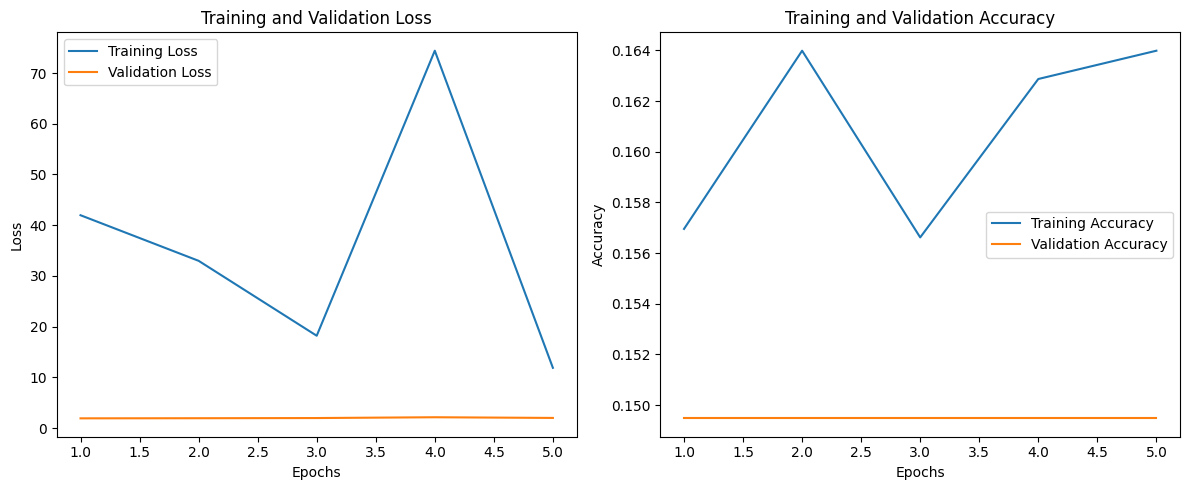

In [8]:
import matplotlib.pyplot as plt
from torch.optim import AdamW
from tqdm import tqdm

def train_and_plot(model, train_loader, val_loader, epochs):
    optimizer = AdamW(model.parameters(), lr=1e-1)
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        correct_predictions = 0
        total_predictions = 0
        for batch in tqdm(train_loader):
            optimizer.zero_grad()
            input_values, labels = batch[0].to(device), batch[1].to(device)
            outputs = model(input_values=input_values, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
            
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1)
            correct_predictions += (predictions == labels).sum().item()
            total_predictions += labels.size(0)
        
        train_accuracy = correct_predictions / total_predictions
        train_losses.append(total_loss / len(train_loader))
        train_accuracies.append(train_accuracy)

        # Validation
        model.eval()
        total_eval_loss = 0
        correct_eval_predictions = 0
        total_eval_predictions = 0
        for batch in tqdm(val_loader):
            with torch.no_grad():
                input_values, labels = batch[0].to(device), batch[1].to(device)
                outputs = model(input_values=input_values, labels=labels)
                loss = outputs.loss
                
                total_eval_loss += loss.item()
                
                logits = outputs.logits
                predictions = torch.argmax(logits, dim=-1)
                correct_eval_predictions += (predictions == labels).sum().item()
                total_eval_predictions += labels.size(0)

        val_accuracy = correct_eval_predictions / total_eval_predictions
        val_losses.append(total_eval_loss / len(val_loader))
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch + 1}, Training loss: {train_losses[-1]}, Training accuracy: {train_accuracies[-1]}, Validation loss: {val_losses[-1]}, Validation accuracy: {val_accuracies[-1]}")

    # Plotting
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
    plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs+1), train_accuracies, label='Training Accuracy')
    plt.plot(range(1, epochs+1), val_accuracies, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()



train_and_plot(model, train_loader, val_loader, 5)


In [9]:
model.save_pretrained('audio_model_pretrained')
processor.save_pretrained('audio_processor_pretrained')

[]